In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
dataset_path = 'dataset/'

database = list()
path_list = os.listdir(dataset_path)
for image in path_list[:]:
    #print(image)
    split_name = image.split('-')
    if(split_name[0] == 'note'):
        database.append([split_name[3][:-4],split_name[0],split_name[1],split_name[2]])
    elif(split_name[0] == 'rest'):
        database.append([split_name[2][:-4],split_name[0],split_name[1],'rest'])
    else:
        path_list.remove(image)


In [3]:
original_db = pd.DataFrame(data=database,
                    index=path_list,
                 columns=['ID', 'type', 'duration', 'pitch'])
original_db


,ID,type,duration,pitch
note-half-f1-359.png,359,note,half,f1
note-eighth-f1-3374.png,3374,note,eighth,f1
rest-quarter-506.png,506,rest,quarter,rest
note-eighth-c2-1463.png,1463,note,eighth,c2
note-half-g1-2488.png,2488,note,half,g1
rest-eighth-3984.png,3984,rest,eighth,rest
note-eighth-a1-2973.png,2973,note,eighth,a1
rest-eighth-4741.png,4741,rest,eighth,rest
rest-quarter-1443.png,1443,rest,quarter,rest
note-quarter-h1-4675.png,4675,note,quarter,h1


In [4]:
original_db.describe()


,ID,type,duration,pitch
count,3824,3824,3824,3824
unique,3824,2,6,19
top,2551,note,eighth,rest
freq,1,3272,1570,552


In [5]:
db = original_db.groupby(['type','duration']).size().unstack(fill_value=0)
db = db[['whole','half','quarter','eighth','sixteenth','other']]
db


duration,whole,half,quarter,eighth,sixteenth,other
type,,,,,,
note,49,449,1184,1304,276,10
rest,43,26,216,266,1,0


In [6]:
# Distribución por notas
db = original_db.groupby(['duration','pitch']).size().unstack(fill_value=0)
#db = db[['g','a','h','c1','d1','e1','f1','g1','a1','h1','c2','d2','e2','f2','g2','a2','h2','c3']]
db = db[['g','a','h','c1','d1','e1','f1','g1','a1','h1','c2','d2','e2','f2','g2','a2','h2','c3','rest']]
db = db.reindex(['whole','half','quarter','eighth','sixteenth','other'])
db


pitch,g,a,h,c1,d1,e1,f1,g1,a1,h1,c2,d2,e2,f2,g2,a2,h2,c3,rest
duration,,,,,,,,,,,,,,,,,,,
whole,0,6,1,0,3,14,8,1,5,3,1,1,5,0,0,0,1,0,43
half,1,13,16,32,34,52,74,45,59,41,38,21,13,6,1,1,2,0,26
quarter,0,18,21,56,113,159,137,126,174,118,87,97,43,17,7,8,2,1,216
eighth,0,3,52,70,85,147,127,166,168,164,113,97,69,23,8,7,5,0,266
sixteenth,0,3,10,14,19,26,20,33,21,40,30,27,15,8,6,4,0,0,1
other,0,0,0,0,1,0,2,0,0,2,2,1,2,0,0,0,0,0,0


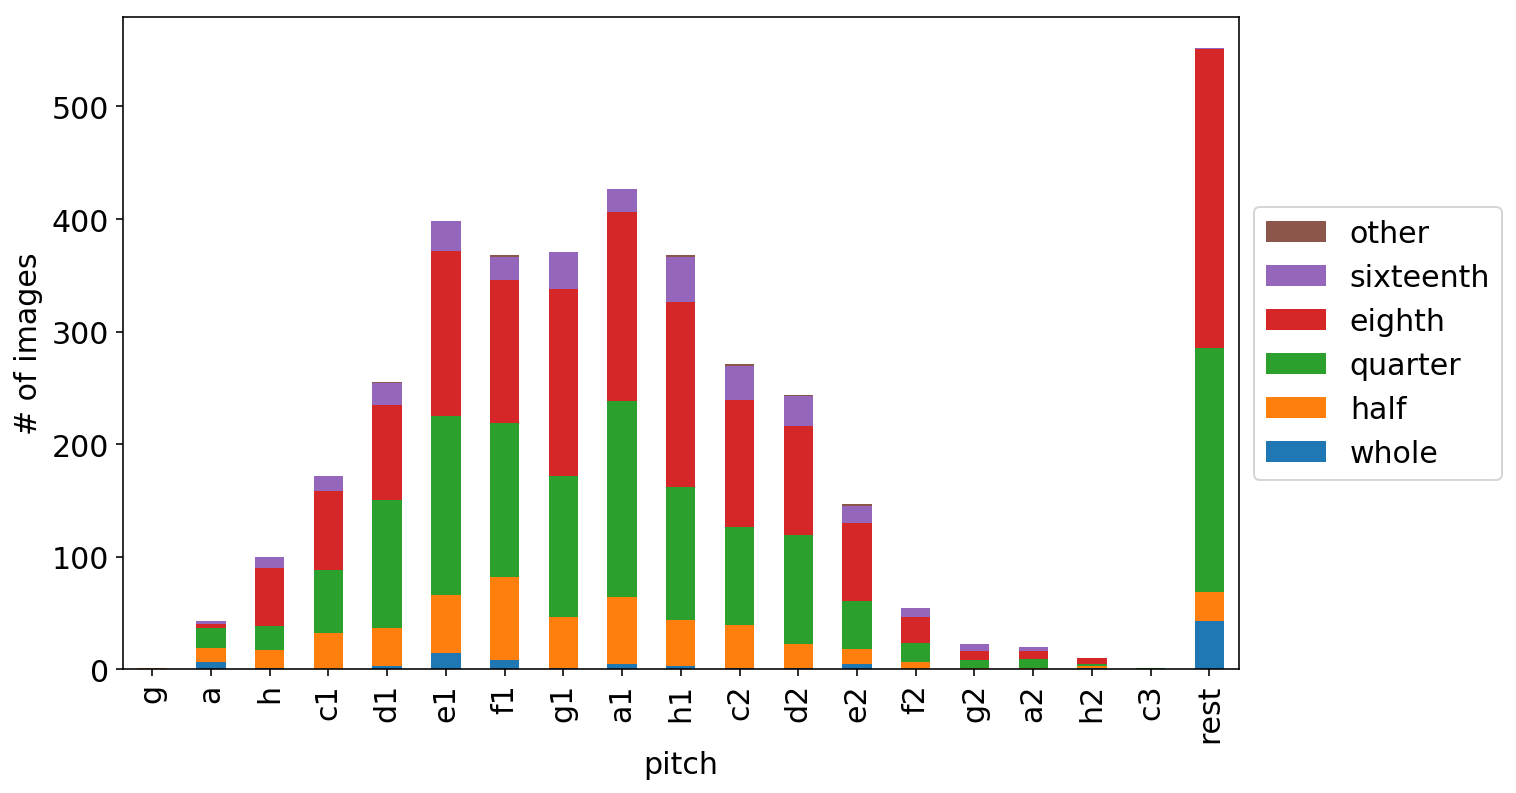

In [7]:
plt.rcParams.update({'font.size': 15})

db_t = db.transpose()
db_t.plot.bar(stacked=True,legend=False)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('# of images')

fig = plt.gcf()

fig.set_size_inches(10, 6)


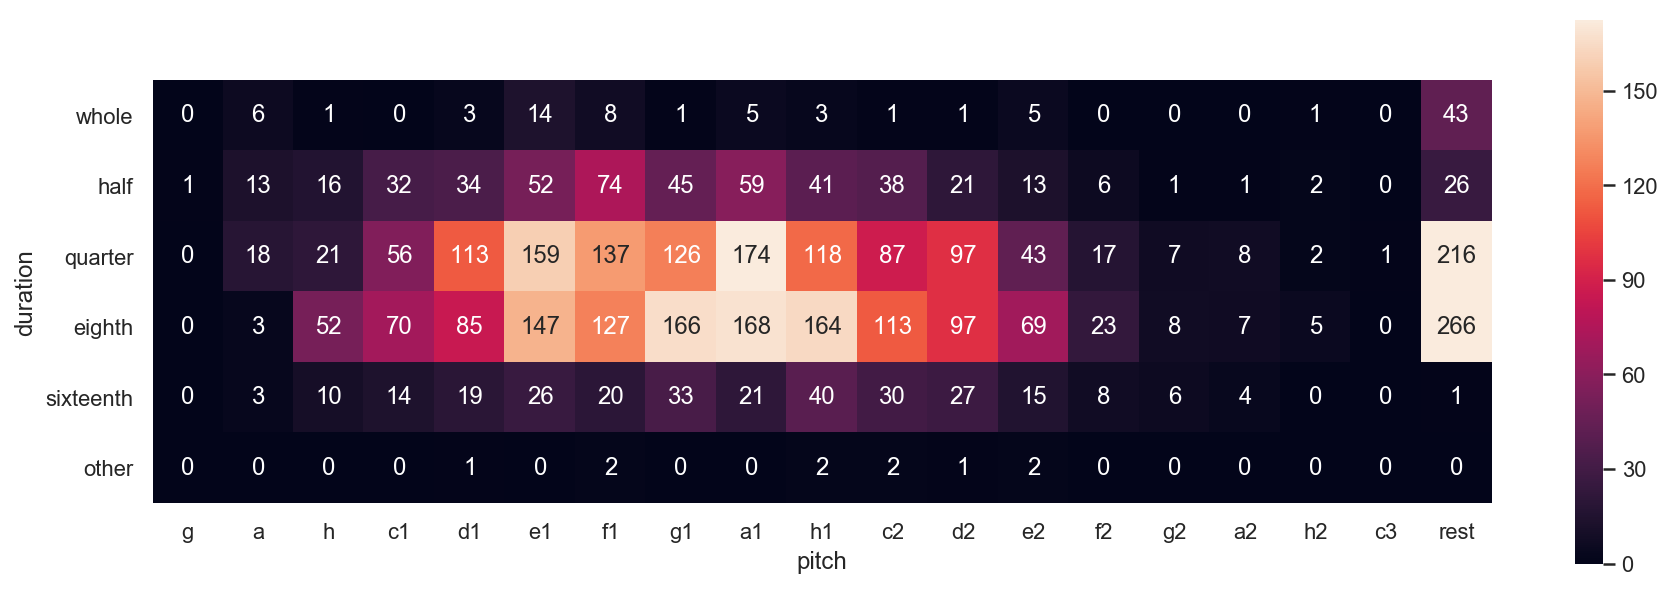

In [8]:
import matplotlib.pyplot as plt
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(db, annot=True, fmt="d", robust=True, square=True,ax=ax)


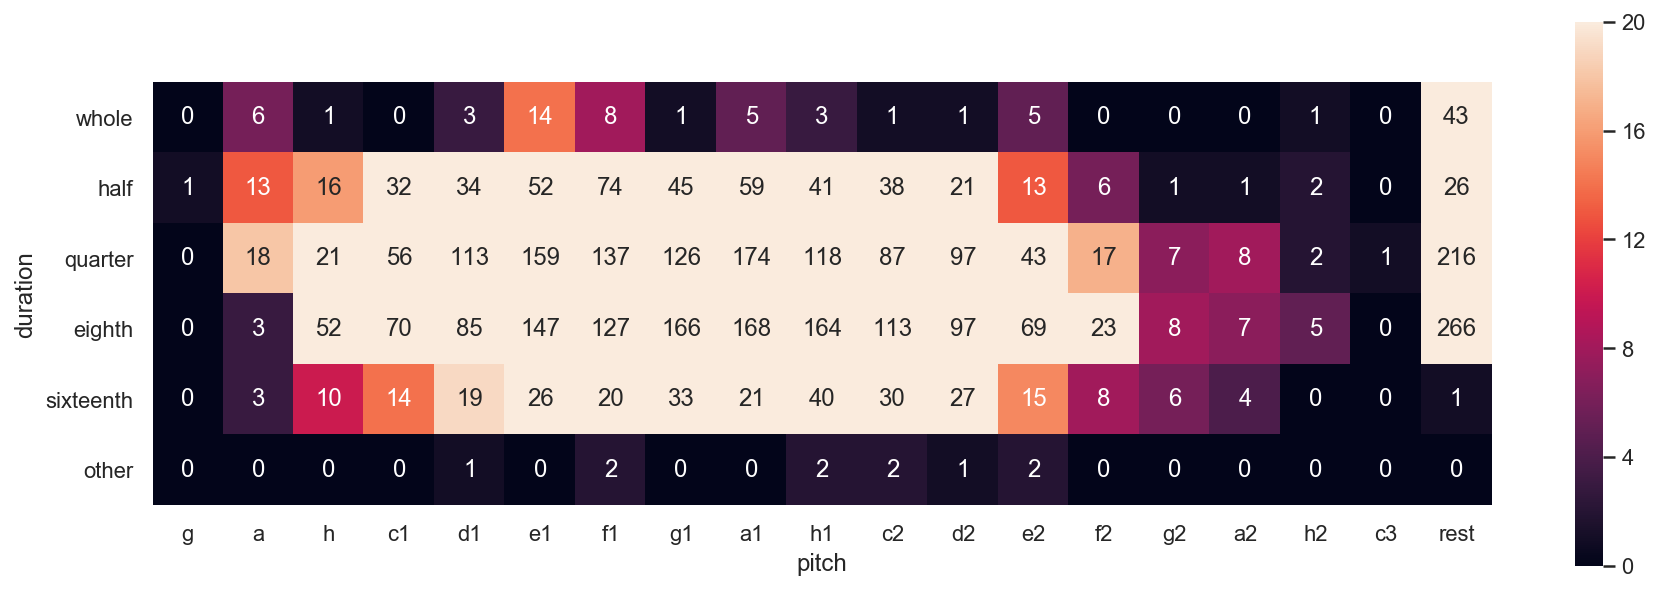

In [9]:
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(db, annot=True, fmt="d", vmax=20, square=True,ax=ax)
